# Fake News Detector

### Alex Hedrick

#### About the data (downloaded from Kaggle):

(WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

Published in:
IEEE Transactions on Computational Social Systems: pp. 1-13 (doi: 10.1109/TCSS.2021.3068519).

0 = fake, 1 = real

In [47]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import nltk

# read data
news = pd.read_csv('news_data_2_recent/WELFake_Dataset.csv', sep=',', names = ['index','title','body','label'], header = None, skiprows = 1)
news = news.drop('index', axis=1)
news.head()

,title,body,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


#### Data Preprocessing

In [48]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# remove all rows with missing values
news = news.dropna()

# only keep first 5000 rows of news
news = news[:5000]

# remove all non-alphanumeric characters from news
news['title'] = news['title'].str.replace('[^a-zA-Z0-9]', ' ')
news['body'] = news['body'].str.replace('[^a-zA-Z0-9]', ' ')

# convert all news to lowercase
news['title'] = news['title'].str.lower()
news['body'] = news['body'].str.lower()

# make objects in 'title' and 'body' strings
news['title'] = news['title'].astype(str)
news['body'] = news['body'].astype(str)

# word tokenize news for lemmatizer
news['title'] = news['title'].apply(nltk.word_tokenize)
news['body'] = news['body'].apply(nltk.word_tokenize)

# lemmatize news
lemmatizer = nltk.stem.WordNetLemmatizer()
news['title'] = news['title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))
news['body'] = news['body'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

# word tokenize news again
# news['title'] = news['title'].apply(nltk.word_tokenize)
# news['body'] = news['body'].apply(nltk.word_tokenize)

# replace 0 with -1 for label
# now, -1 = fake news, 1 = real news
news['label'] = news['label'].replace(0, -1)

news.head()

,title,body,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
2,unbelievable obama s attorney general say most...,now most of the demonstrator gathered last nig...,1
3,bobby jindal raised hindu us story of christia...,a dozen politically active pastor came here fo...,-1
4,satan 2 russia unvelis an image of it terrifyi...,the r 28 sarmat missile dubbed satan 2 will re...,1
5,about time christian group sue amazon and splc...,all we can say on this one is it s about time ...,1


#### Data Visualization

In [60]:
# # make a word cloud of the most common words in the news titles and bodies
# from wordcloud import WordCloud, STOPWORDS
# stopwords = set(STOPWORDS)
# stopwords = ["s","wa","u","ha"] + list(STOPWORDS)

# # make a word cloud of the most common words in the news titles
# title_words = ' '.join(news['title'])
# title_wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(title_words)

# # plot the WordCloud image
# plt.figure(figsize = (6, 6), facecolor = None)
# plt.imshow(title_wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
# plt.title('most common words in news titles')
# plt.show()


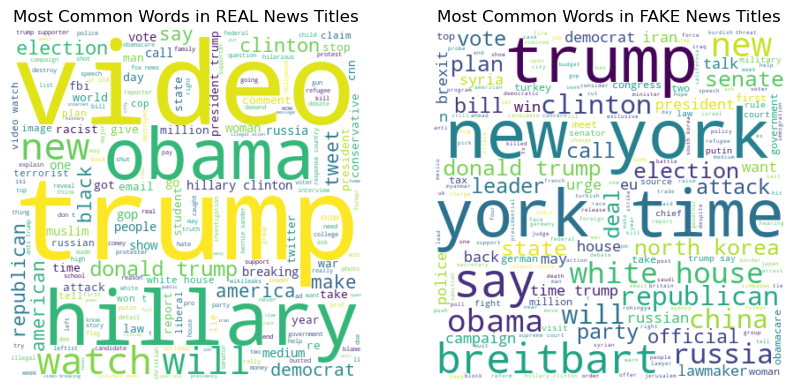

In [62]:
# most common words in news titles

# filter news by label 1
news_label1 = news[news['label'] == 1]

# filter news by label -1
news_labelminus1 = news[news['label'] == -1]

# set up stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["s", "wa", "u", "ha"])

# create WordCloud for label 1
title_words_label1 = ' '.join(news_label1['title'])
title_wordcloud_label1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(title_words_label1)

# create WordCloud for label -1
title_words_labelminus1 = ' '.join(news_labelminus1['title'])
title_wordcloud_labelminus1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(title_words_labelminus1)

# plot the two WordClouds side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(title_wordcloud_label1, interpolation='bilinear')
ax[0].set_title('Most Common Words in REAL News Titles')
ax[0].axis('off')
ax[1].imshow(title_wordcloud_labelminus1, interpolation='bilinear')
ax[1].set_title('Most Common Words in FAKE News Titles')
ax[1].axis('off')
plt.show()


In [63]:
# # make a word cloud of the most common words in the news bodies
# body_words = ' '.join(news['body'])
# body_wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(body_words)

# # plot the WordCloud image
# plt.figure(figsize = (6, 6), facecolor = None)
# plt.imshow(body_wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
# plt.title('most common words in news bodies')
# plt.show()

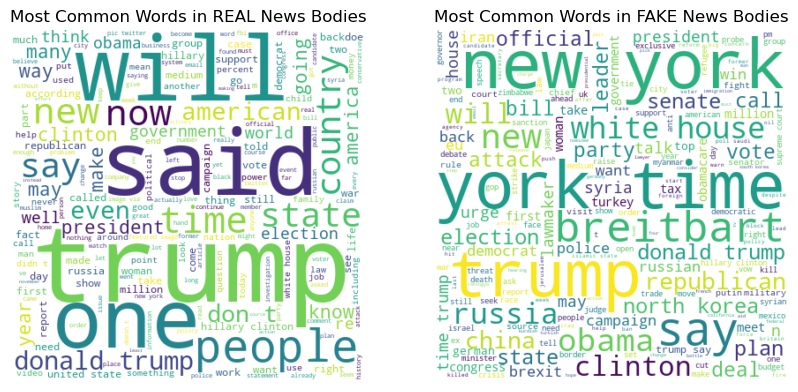

In [64]:
# most common words in news bodies
# note: must run cell that creates news_label1 and news_labelminus1 first

# create WordCloud for label 1
body_words_label1 = ' '.join(news_label1['body'])
body_wordcloud_label1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(body_words_label1)

# create WordCloud for label -1
body_words_labelminus1 = ' '.join(news_labelminus1['title'])
body_wordcloud_labelminus1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(body_words_labelminus1)

# plot the two WordClouds side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(body_wordcloud_label1, interpolation='bilinear')
ax[0].set_title('Most Common Words in REAL News Bodies')
ax[0].axis('off')
ax[1].imshow(body_wordcloud_labelminus1, interpolation='bilinear')
ax[1].set_title('Most Common Words in FAKE News Bodies')
ax[1].axis('off')
plt.show()


From these word clouds, we can clearly see that most of the articles, fake and real, are about politics. Therefore, the classifier will be better at classifying an article if it is about politics and likely will not accurately predict fake news about sports, science, or other topics.

Furthermore, there are clear differences between the word clouds. Hopefully, we can exploit these differences and create a classifier that can reasonably accurately classify whether an article is fake or not just by looking at how often the most common words appear in the title and body of the article.

#### Generate Multinomial Features

Generate multinomial features based on the number of occurrences of the most common words in 'title' and 'body' using sklearn CountVectorizer

In [51]:
# generate multinomial features based on the number of occurrences of a set of words in the message using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# split messages into training and validation sets
validation_data_length = 500
# validation_data_length = 4000
news_training = news.iloc[:-validation_data_length,:]
news_validation = news.iloc[-validation_data_length:,:]

# look at only most frequent m words
m = [500, 1000, 2500, 5000]

# initalize empty lists to hold feature names and count features
training_names = []
training_features = []
vali_names = []
vali_features = []

# apply CountVectorizer to messages
for i in m:
    count_vectorizer = CountVectorizer(stop_words='english', max_features=i)

    # get count features for vali data
    training_features_temp = count_vectorizer.fit_transform(news_training['title'])

    # convert matrix to array
    training_features_temp = training_features_temp.toarray()

    # append count features and feature names to lists
    training_features.append(training_features_temp)
    training_names.append(count_vectorizer.get_feature_names())

for i in m:
    count_vectorizer = CountVectorizer(stop_words='english', max_features=i)

    # get count features for vali data
    vali_features_temp = count_vectorizer.fit_transform(news_training['title'])

    # convert matrix to array
    vali_features_temp = vali_features_temp.toarray()

    # append count features and feature names to lists
    vali_features.append(vali_features_temp)
    vali_names.append(count_vectorizer.get_feature_names())
    

# now we have a list of count features and feature names for each value of m
print(training_features[0].shape)

(4500, 500)


#### SKLearn SVM Implementation

I start with sklearn's SVM implementation because it is much faster than mine. I perform a number of trials to determine optimal prediction parameters then run these parameters on my own SVM code.

#### Parameters to test:
- class_weight = 'balanced' or not
- check svc documentation and look for more sklearn params
- number of words (m)
- how much influence 'title' has vs. 'body' text
- training data length
- 'c' value for soft svm
- type of kernel 'linear' vs others
- different types of algorithms (soft svm, naive bayes, ...)

In [52]:
# from sklearn.svm import SVC
# from cvxopt import matrix as cvxopt_matrix
# from cvxopt import solvers as cvxopt_solvers

# training_labels = news_training['label'].values
# vali_labels = news_validation['label'].values

# # implement soft-margin SVM with c = 0.1 
# c = 0.1

# # use sklearn's svc to classify the datasets 
# for i in range(0,len(m)):
#     # find separator
#     clf = SVC(C=c, kernel='linear', class_weight='balanced')
#     clf.fit(training_features[i], training_labels)

#     # predictor and validation loss
#     y = clf.predict(vali_features[i])
#     y = np.int0(y)

#     n = len(vali_labels)
#     correct_pct = 0
#     for j in range(0,n):
#         # if y == vali_labels, add 1 to correct_pct
#         if y[j] == vali_labels[j]:
#             correct_pct += 1
#     correct_pct = 100*correct_pct/n

#     print(f"for m = {m[i]}, percent of correct guesses = {correct_pct} %")